In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import skimage.io as io
from skimage import util

from glob import glob
import trackpy

import ast
from ipywidgets import widgets
import matplotlib.animation as animation

## Read data

In [2]:
file_list=glob("../data/*_Dark_prepared.tif")
images_dict={}
for file_name in file_list:
    images_prepared=io.imread(file_name)
    file_prefix=os.path.split(file_name)[1].split('.')[0].split("_prepared")[0]
    
    binary_file=file_name.split(".tif")[0]+'_segmented'+'.tif'
    images_binary=io.imread(binary_file)
    tracks=pd.read_csv("../data/tracks_overlay_id_"+file_prefix+'.csv')
    tracks_big=pd.read_csv("../data/tracks_overlay_id_"+file_prefix+'_big.csv')
    img_dict={"img":images_prepared,"binary":images_binary,"tracks":tracks,"tracks_big":tracks_big}
    
    images_dict[file_prefix]=img_dict

In [3]:
images_dict.keys()

dict_keys(['43125_Dark', '43121_Dark', '43122_Dark', '43123_Dark'])

## Select trajectories

In [55]:
file_prefix='43122_Dark'

###========================================####
tracks=images_dict[file_prefix]["tracks_big"]
images=images_dict[file_prefix]["img"]
binary=images_dict[file_prefix]["binary"]


## Animation

NameError: name 'i' is not defined

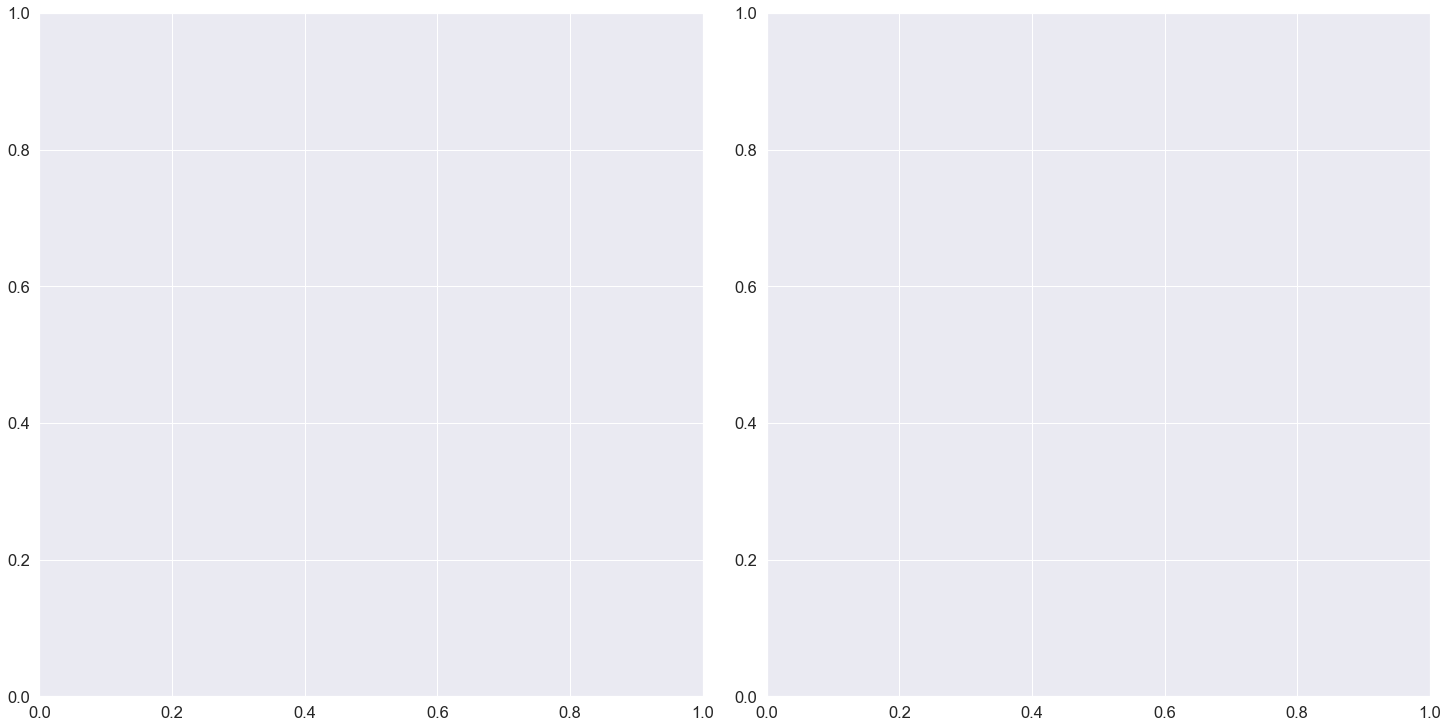

In [44]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10),constrained_layout=True)
ax[0].imshow(images[i],cmap='gray')
ax[0].set_title("{}".format(file_prefix))
ax[0].axis("off")
    
ax[1].imshow(binary[i],cmap='gray')
ax[1].axis("off")
ax[1].set_title("segmented");

ax[1].annotate('frame={}'.format(0), xy=(0, 0),xytext=(0,-5));

In [56]:
def plot_scale_bar(ax,px_micron=1.42,size=500):
    n_pixels=size/px_micron
    rows,cols=images.shape[1],images.shape[2]
    col_start=(cols-n_pixels)-500
    row_start=(rows-100)
    ax.plot([col_start,col_start+n_pixels],[row_start,row_start],color='cyan')
    ax.text(col_start+1,row_start-25,s="{} micron".format(size),color="cyan")
    print(n_pixels)

In [57]:
100/1.42

70.42253521126761

352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605633805
352.11267605

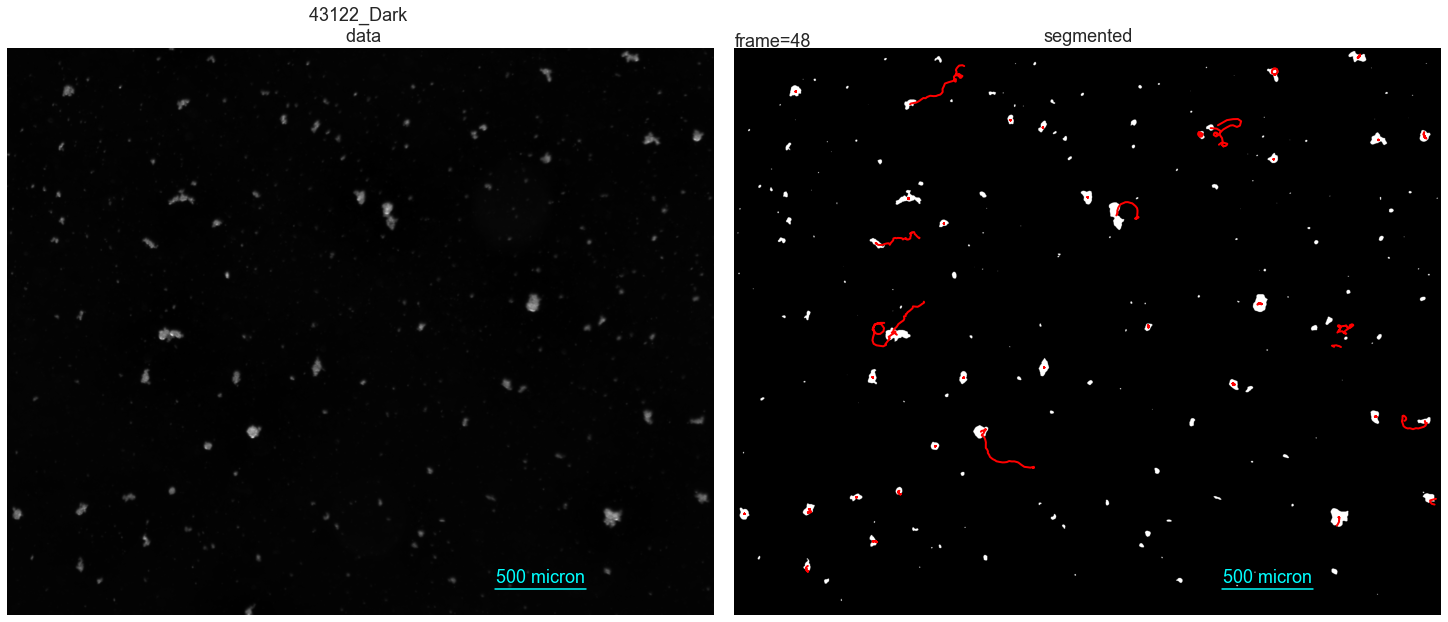

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

sns.set(font_scale=1.5)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10),constrained_layout=True)
ax[0].set_title("{} \n data".format(file_prefix))
ax[0].axis("off")


ax[1].set_title("segmented")
ax[1].axis("off")



nFrames=images.shape[0]
camera = Camera(fig)

for frame in range(nFrames):
    ax[0].imshow(images[frame],cmap='gray')
    plot_scale_bar(ax[0],px_micron=1.42)
    ax[1].imshow(binary[frame],cmap='gray')
    ax[1].annotate('frame={}'.format(frame), xy=(0, 0),xytext=(0,-5))
    plot_scale_bar(ax[1],px_micron=1.42)
    
    # plot trajectories
    tracks_frame=tracks[tracks['frame']<=frame]
    for id,group in tracks_frame.groupby("particle"):
        ax[1].plot(group['x'],group['y'],lw=2,color='red')
    
    
    camera.snap()
    
animation = camera.animate()

# from IPython.display import HTML
# HTML(animation.to_html5_video())

animation.save('../results/{}_animation.mp4'.format(file_prefix))